In [1]:
#Basic Text Analysis of the comments made in the New York Times using Support Vector Machine(SVM).
import numpy as np
import gensim
import csv
import sys,os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
from sklearn import svm
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import accuracy_score
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
import nltk
from nltk.tokenize import wordpunct_tokenize
from sklearn.datasets import load_digits
%matplotlib inline

C:\Users\Nikhil Mysore\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Reading the CSV File 
data1= pd.read_excel("Feb2017.xlsx")

In [5]:
#Creating dataframes for comments made in Feb 2017(comment body) and the comment 
document_comments_text = data1['commentBody']
document_comments_label=data1['sectionName']

In [6]:
#Removing the stopwords from the Datset
sample1 = document_comments_text.apply(lambda x: [item for item in x if item not in stopwords.words("english")])

In [7]:
new_documents=sample1.apply(lambda x : "".join(x))

In [8]:
new_documents

0      ANY n Trup prpgn fr Gg n  TV ge ff eel n I wll...
1      I'll n wch he SB, nr he gr r cr.  The enernen ...
2      NFL' gng   nher "n-ur-fce, Aerc" Super Bwl hlf...
3      I' cnnull ze  he ll-plce creence ffre prl r un...
4      Pernll, I  n wn  ee n plc  ll urng  ge fr he l...
5      Kepernck n h fellw ple punk w he l rw fr e,  w...
6                                        I' e - Dn' wch.
7      Lef NFL ch ee eerne  nger he eve NFL fn n  een...
8                                   Plc  b fr pr, per.  
9      I wn' be wchng, ju lke he re f he en.  I w n v...
10                          rger hul reeber wh wche fbll
11     Hw up re he? The NFL  lre eeng  rp n revenue b...
12     Ye, le' ll ju huffle h uff  he e, weep  uner h...
13     Yu e ennng he "elephn n he r" plcl pec f he Su...
14     Cn u gne Rger G kng n kn f cen, h gu   l, eve ...
15     110 lln peple wll be wchng bu 3 e h wul wch he...
16     The NFL  eperel rng  prve   n pr f he lberl e ...
17     Plen f u lberl lke  wch 

In [9]:
#Print the average document length for the datset.
def average_length(document_text):
    length_list=[]
    for text in document_text:
        text_list=text.strip().split()
        length_list.append(len(text_list))
    return(sum(length_list)/len(length_list))

In [20]:
print("Average Length of text used for comments :{}".format(average_length(new_documents)))

Average Length of text used for comments :62.824120603015075


In [11]:
#Printing a list of all the words in the dataset.
def join_list(doc_text):
    word_list=[]
    for doc in doc_text:
        doc_list=doc.strip().split()
        word_list.extend(doc_list)
        return word_list

In [12]:
#Now, we focus on how to represent the data and get the BOW(Bag of words model for the document data )
vectorizer1 = text.CountVectorizer()

In [13]:
new_documents_bow = vectorizer1.fit_transform(new_documents)

In [14]:
#Getting the TF-IDF representation for the document data
tfidf_vectorizer1 = text.TfidfVectorizer()

In [15]:
new_documents_tfidf = tfidf_vectorizer1.fit_transform(new_documents)

In [18]:
#Printing the shape of the BOW representation for the dataset
print("Comments vector size:{}".format(new_documents_bow.get_shape()))

Comments vector size:(199, 2106)


In [19]:
#Printing the shape of the TF-IDF represenation for the dataset
print("Comments vector size:{}".format(new_documents_tfidf.get_shape()))

Comments vector size:(199, 2106)


In [21]:
#We now conduct an SVM Analysis on the Dataset. We choose 80% of the data as our training data and 20% of our data as test data
def svm_classification(doc_vector,doc_label):
    #Training 80% of our data 
    random_index=np.random.choice(len(doc_label),int(0.8*len(doc_label)),replace=False)
    svm_classify=svm.LinearSVC()
    #Training the classification model
    svm_classify.fit(doc_vector[random_index],np.array(doc_label)[random_index])
    #Predicting the next 20% of our data,First create an index for the data
    data_index= np.arange(0,len(doc_label))
    #Find the Index for the test data
    test_index=np.array([i for i in data_index if i not in random_index])
    pred_label = svm_classify.predict(doc_vector[test_index])
    accuracy=accuracy_score(np.array(doc_label)[test_index],pred_label)
    return accuracy

In [22]:
#We use the BOW(Bag of Words) representation for training SVM
accuracy_score_bow = pd.DataFrame(columns=["dataset","Accuracy Score"])
for i in range(5):
    print("#{}round".format(i))
    new_documents_accuracy=svm_classification(new_documents_bow.toarray(),document_comments_label)
    accuracy_score_bow.loc[len(accuracy_score_bow)]=["Comments",new_documents_accuracy]

#0round
#1round
#2round
#3round
#4round


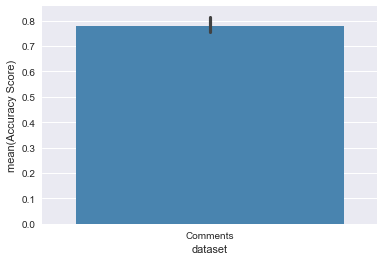

In [23]:
sns.barplot(x="dataset",y="Accuracy Score",data=accuracy_score_bow,palette="Blues_d")

In [24]:
accuracy_score_bow

,dataset,Accuracy Score
0,Comments,0.775
1,Comments,0.850
2,Comments,0.750
3,Comments,0.750
4,Comments,0.775


In [26]:
#Now, we use the TF-IDF represenation for training SVM
accuracy_score_tfidf=pd.DataFrame(columns=["dataset","Accuracy Score"])
for i in range(5):
    print("#{}round".format(i))
    new_documents_accuracy=svm_classification(new_documents_tfidf.toarray(),document_comments_label)
    accuracy_score_tfidf.loc[len(accuracy_score_tfidf)]=["Comments",new_documents_accuracy]

#0round
#1round
#2round
#3round
#4round


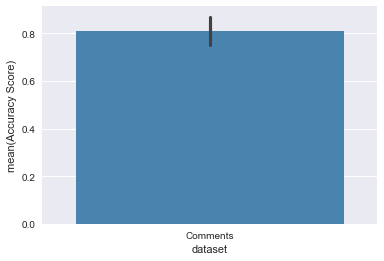

In [27]:
sns.barplot(x="dataset",y="Accuracy Score",data=accuracy_score_tfidf,palette="Blues_d")

In [28]:
accuracy_score_tfidf

,dataset,Accuracy Score
0,Comments,0.875
1,Comments,0.750
2,Comments,0.700
3,Comments,0.850
4,Comments,0.875
